In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, TimeDistributed, Flatten, Dense



1. Read and explore the data 

In [ ]:
df = pd.read_json('/content/Sarcasm_Headlines_Dataset.json',lines = True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [ ]:
df.describe(include='object')


,headline,article_link
count,28619,28619
unique,28503,28617
top,"'no way to prevent this,' says only nation whe...",https://politics.theonion.com/nation-not-sure-...
freq,12,2


In [ ]:
#checking for null values 
df.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [ ]:
#Duplicated Records Drop
df['headline'].duplicated().sum()


116

In [ ]:
df=df.drop(df[df['headline'].duplicated()].index,axis=0)


Checking websites uniques:

In [ ]:
df.describe(include='object')


,headline,article_link
count,28503,28503
unique,28503,28503
top,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
freq,1,1


In [ ]:
##The column headline needs to be cleaned up as we have special characters and numbers in the column

import re
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
def cleanData(text):
  text = re.sub(r'\d+', '', text)
  text = "".join([char for char in text if char not in string.punctuation])
  return text

df['headline']=df['headline'].apply(cleanData)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2. Retain relevant columns 

As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [ ]:
df.drop('article_link',inplace=True,axis=1)

In [ ]:
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails why congress is falling ...
2,0,eat your veggies deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word stream...


3. Get length of each sentence

In [ ]:
def length(phrase):
  return len(phrase.split())

In [ ]:
df["length"] = df["headline"].apply(length)
df.head()

,is_sarcastic,headline,Web-site,length
0,1,thirtysomething scientists unveil doomsday clo...,The Onion,8
1,0,dem rep. totally nails why congress is falling...,Huffington Post,13
2,0,eat your veggies: 9 deliciously different recipes,Huffington Post,7
3,1,inclement weather prevents liar from getting t...,The Onion,8
4,1,mother comes pretty close to using word 'strea...,The Onion,9


<Figure size 432x288 with 0 Axes>

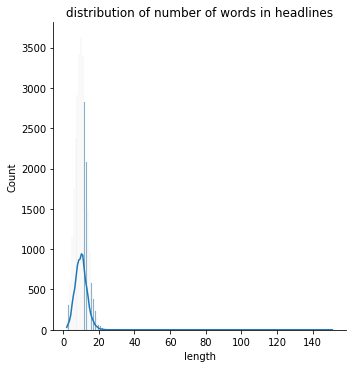

In [ ]:
plt.figure()
sns.displot(data = df, x = "length", kde = True)
plt.title("distribution of number of words in headlines")
plt.show()

In [ ]:
maxlen = max([len(text) for text in df['headline']])

In [ ]:
maxlen

910

4. Define parameters 

In [ ]:
max_features = 10000
maxlen = max([len(text) for text in df['headline']])
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [ ]:
tokenizer = Tokenizer(num_words=max_features,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(df['headline'])

5. Get indices for words 

In [ ]:
vocab_size = 10000
max_length = 32
embedding_dim = 32
padding_type='post'
oov_token = '<OOV>'

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(df)
word_index = tokenizer.word_index

In [ ]:
word_index

{'<OOV>': 1,
 'is': 2,
 'sarcastic': 3,
 'headline': 4,
 'web': 5,
 'site': 6,
 'length': 7}

6. Create features and labels 

In [ ]:
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 28503
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

7. Get vocabulary size 

In [ ]:
num_words=len(tokenizer.word_index)
print (num_words)

28846


8. Create a weight matrix using GloVe embeddings

In [ ]:
glove_file = project_path + "glove.6B.zip"

In [ ]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.


In [ ]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd


9. Define and compile a Bidirectional LSTM model.

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
#Define Model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=910))
model.add(LSTM(units=100, return_sequences=True, dropout=0.2))
model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
#Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 910, 100)          1000000   
                                                                 
 lstm_1 (LSTM)               (None, 910, 100)          80400     
                                                                 
 time_distributed_1 (TimeDis  (None, 910, 100)         10100     
 tributed)                                                       
                                                                 
 flatten_1 (Flatten)         (None, 91000)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 91001     
                                                                 
Total params: 1,181,501
Trainable params: 1,181,501
Non-trainable params: 0
____________________________________________

10. Fit the model and check the validation accuracy 

In [ ]:
history = model.fit(train_X, np.array(train_y), batch_size=300, epochs=3, validation_split=0.1, verbose=1)


Epoch 1/3
69/69 [==============================] - 258s 4s/step - loss: 0.2622 - accuracy: 0.8932 - val_loss: 0.3395 - val_accuracy: 0.8549
Epoch 2/3
69/69 [==============================] - 259s 4s/step - loss: 0.1929 - accuracy: 0.9259 - val_loss: 0.3680 - val_accuracy: 0.8540
Epoch 3/3
69/69 [==============================] - 254s 4s/step - loss: 0.1434 - accuracy: 0.9472 - val_loss: 0.4234 - val_accuracy: 0.8466


In [ ]:
results = model.evaluate(test_X, test_y)


179/179 [==============================] - 22s 123ms/step - loss: 0.4472 - accuracy: 0.8432


In [ ]:
from sklearn.metrics import confusion_matrix
predict_y = (model.predict(test_X) > 0.5).astype("int32").flatten()
confusion_matrix(test_y, predict_y)

179/179 [==============================] - 23s 127ms/step


array([[2621,  337],
       [ 557, 2186]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_y, predict_y))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2958
           1       0.87      0.80      0.83      2743

    accuracy                           0.84      5701
   macro avg       0.85      0.84      0.84      5701
weighted avg       0.84      0.84      0.84      5701

